In [2]:
import pickle
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img  # pip install pillow, then restart the kernel


In [9]:
from efficientnet.tfkeras import preprocess_input

In [10]:
LARGE_IMAGE_SIZE = 224  # Size that the base model has as default input size


In [11]:
best_EfficientNetB3_model = keras.models.load_model('EfficientNetB3_large_07_0.927.keras')


In [12]:
print("Loading test animals...")
test_sample_animals = [
    "./img/animals/duck/72decb40db.jpg",
    "./img/animals/crow/03c7cea31f.jpg",
    "./img/animals/possum/3f9a0f744a.jpg",
    "./img/animals/bison/4d50fcf8a7.jpg",
    "./img/animals/pelecaniformes/105d4649cc.jpg",
    "./img/animals/deer/66c58b431f.jpg"
]

Loading test animals...


In [13]:
# The classes were also saved previously as pkl, so we can use them as such:
with open('encoded_classes.pkl', 'rb') as inp:
    encoded_classes = pickle.load(inp)

In [14]:
print("Predicting...")
for i, sample_path in zip(np.arange(len(test_sample_animals)), test_sample_animals):
    test_sample_img = load_img(sample_path)
    print("\nSAMPLE image: ",sample_path)
    x = np.array(test_sample_img)
    #print(x.shape)
    x = center_crop_and_resize(x, image_size=LARGE_IMAGE_SIZE)
    #print(x.shape)
    X = preprocess_input(x)
    X = np.expand_dims(X, 0) # expand dimensions
    #X = np.array([X])  # expand dimensions
    
    #print("\t", X.shape)
    pred = best_EfficientNetB3_model.predict(X)
    y_pred = np.argmax(pred, axis = 1)
    predicted_class = y_pred
    predicted_proba = np.asarray(tf.reduce_max(pred)).flatten()[0]
    predicted_label = encoded_classes[y_pred[0]]
    print("Predicted class: ", y_pred[0])
    print("Predicted label: ",predicted_label)
    print("Predicted proba: ", predicted_proba)

Predicting...

SAMPLE image:  ./img/animals/duck/72decb40db.jpg
1/1 [==============================] - 4s 4s/step
Predicted class:  22
Predicted label:  duck
Predicted proba:  0.9989586

SAMPLE image:  ./img/animals/crow/03c7cea31f.jpg
1/1 [==============================] - 0s 184ms/step
Predicted class:  16
Predicted label:  crow
Predicted proba:  0.9969054

SAMPLE image:  ./img/animals/possum/3f9a0f744a.jpg
1/1 [==============================] - 0s 136ms/step
Predicted class:  66
Predicted label:  possum
Predicted proba:  0.8718428

SAMPLE image:  ./img/animals/bison/4d50fcf8a7.jpg
1/1 [==============================] - 0s 158ms/step
Predicted class:  6
Predicted label:  bison
Predicted proba:  0.98868936

SAMPLE image:  ./img/animals/pelecaniformes/105d4649cc.jpg
1/1 [==============================] - 0s 162ms/step
Predicted class:  61
Predicted label:  pelecaniformes
Predicted proba:  0.99506265

SAMPLE image:  ./img/animals/deer/66c58b431f.jpg
1/1 [==============================] 

# Convert Keras to TFLite

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(best_EfficientNetB3_model)
tflite_model = converter.convert()

with open("EfficientNetB3_large_07_0.927.tflite", "wb") as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ROBERT~1\AppData\Local\Temp\tmps7c8giki\assets


INFO:tensorflow:Assets written to: C:\Users\ROBERT~1\AppData\Local\Temp\tmps7c8giki\assets


In [17]:
import tensorflow.lite as tflite

In [18]:
interpreter = tflite.Interpreter(model_path = "EfficientNetB3_large_07_0.927.tflite")
interpreter.allocate_tensors()

In [19]:
interpreter.get_input_details()

[{'name': 'serving_default_inputLayer:0',
  'index': 0,
  'shape': array([  1, 224, 224,   3]),
  'shape_signature': array([ -1, 224, 224,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [20]:
interpreter.get_input_details()[0]["index"]

0

In [30]:
input_index = interpreter.get_input_details()[0]["index"]

In [22]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 768,
  'shape': array([ 1, 90]),
  'shape_signature': array([-1, 90]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [23]:
output_index = interpreter.get_output_details()[0]["index"]
output_index

768

In [44]:
## ORIGINAL APPROACH (using the model directly) 
# try with a sample image:
test_img_path = "./img/animals/duck/72decb40db.jpg"
test_sample_img = load_img(test_img_path)
print("\nSAMPLE image: ",test_img_path)
x = np.array(test_sample_img, dtype="float32")
#print(x.shape)
x = center_crop_and_resize(x, image_size=LARGE_IMAGE_SIZE)
#print(x.shape)
X = preprocess_input(x)
X = np.expand_dims(X, 0) # expand dimensions
#X = np.array([X])  # expand dimensions

#print("\t", X.shape)
pred = best_EfficientNetB3_model.predict(X)
y_pred = np.argmax(pred, axis = 1)
predicted_class = y_pred
predicted_proba = np.asarray(tf.reduce_max(pred)).flatten()[0]
predicted_label = encoded_classes[y_pred[0]]
print("Predicted class: ", y_pred[0])
print("Predicted label: ",predicted_label)
print("Predicted proba: ", predicted_proba)


SAMPLE image:  ./img/animals/duck/72decb40db.jpg
1/1 [==============================] - 0s 157ms/step
Predicted class:  22
Predicted label:  duck
Predicted proba:  0.99895847


In [45]:
X.shape

(1, 224, 224, 3)

In [46]:
type(X[0][0][0][0])

numpy.float32

In [47]:
interpreter.set_tensor(input_index,X)

In [48]:
interpreter.invoke()

In [51]:
interpreter.get_tensor(output_index).shape
# these are the predictions (there are 90 classes)

(1, 90)

In [54]:
#Here are the actual predictions (preds)
preds_tflite = interpreter.get_tensor(output_index)
preds_tflite

array([[4.22907533e-06, 1.58134389e-06, 1.43948464e-05, 2.29397278e-06,
        2.51556486e-07, 2.39370411e-06, 1.53725323e-05, 7.44731835e-07,
        1.40139846e-07, 5.24714687e-06, 5.72991041e-08, 6.93065772e-07,
        7.88142370e-06, 2.46119471e-05, 1.06828293e-06, 4.51409875e-07,
        1.37386436e-07, 9.88646207e-06, 5.12249585e-07, 4.98129850e-07,
        1.02799313e-05, 1.50572896e-06, 9.98958468e-01, 3.01348177e-06,
        1.98649718e-06, 1.39685847e-06, 1.83326719e-07, 8.58066016e-07,
        1.95844041e-05, 3.05585331e-06, 3.30227864e-04, 1.33114497e-06,
        2.01422226e-05, 3.18358161e-06, 1.13936594e-05, 7.48687683e-07,
        8.38151536e-05, 9.59467457e-07, 1.08022311e-06, 5.20749950e-08,
        1.00840325e-05, 3.34018324e-07, 3.39430289e-06, 7.58177862e-07,
        1.63867037e-06, 2.25467531e-07, 9.85683528e-06, 1.75994487e-07,
        1.49210457e-08, 4.47408820e-06, 2.54581846e-06, 5.44981674e-07,
        1.15507714e-06, 1.97276086e-06, 9.48346678e-06, 1.120536

In [55]:
# now we do the rest, just as we did in the previous, original approach:
y_pred = np.argmax(preds_tflite, axis = 1)
predicted_class = y_pred
predicted_proba = np.asarray(tf.reduce_max(pred)).flatten()[0]
predicted_label = encoded_classes[y_pred[0]]
print("Predicted class: ", y_pred[0])
print("Predicted label: ",predicted_label)
print("Predicted proba: ", predicted_proba)

Predicted class:  22
Predicted label:  duck
Predicted proba:  0.99895847


In [56]:
# you can see that the same results were obtained 
# as in the original approach (using the original keras model)

# Removing TF dependency

In [57]:
from PIL import Image

In [99]:
# Loading image
with Image.open(test_img_path) as img:
    img = img.resize((LARGE_IMAGE_SIZE,LARGE_IMAGE_SIZE), Image.NEAREST)

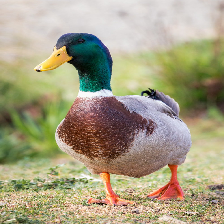

In [100]:
img

In [101]:
x = np.array(img, dtype = 'float32')
x

array([[[225., 217., 214.],
        [225., 217., 214.],
        [225., 217., 214.],
        ...,
        [205., 194., 192.],
        [201., 190., 186.],
        [199., 188., 184.]],

       [[224., 213., 209.],
        [224., 213., 209.],
        [225., 214., 210.],
        ...,
        [196., 182., 179.],
        [194., 181., 175.],
        [193., 180., 174.]],

       [[221., 210., 204.],
        [221., 210., 204.],
        [222., 211., 205.],
        ...,
        [193., 175., 171.],
        [191., 173., 169.],
        [191., 173., 169.]],

       ...,

       [[140., 122.,  84.],
        [156., 142., 105.],
        [105.,  96.,  67.],
        ...,
        [209., 171., 135.],
        [177., 161., 112.],
        [164., 167., 110.]],

       [[150., 142., 105.],
        [138., 132., 100.],
        [102.,  93.,  62.],
        ...,
        [241., 198., 166.],
        [186., 160., 127.],
        [158., 146., 104.]],

       [[142., 143., 103.],
        [ 95., 107.,  59.],
        [ 60.,  

In [81]:
# preprocessing without Tensorflow
# See: https://github.com/qubvel/efficientnet/blob/master/efficientnet/model.py
#  and https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py#L18
#if mode == 'torch':
#        x /= 255.
#        mean = [0.485, 0.456, 0.406]
#        std = [0.229, 0.224, 0.225]

def preprocess_input(x):
    x /= 255.
    #mean = [0.485, 0.456, 0.406]
    #std = [0.229, 0.224, 0.225]
    return x


In [102]:
# actual preprocessing
X = preprocess_input(x)
X = np.expand_dims(X, 0) # expand dimensions (make it "batch")
#X = np.array([X])  # expand dimensions
X

array([[[[0.88235295, 0.8509804 , 0.8392157 ],
         [0.88235295, 0.8509804 , 0.8392157 ],
         [0.88235295, 0.8509804 , 0.8392157 ],
         ...,
         [0.8039216 , 0.7607843 , 0.7529412 ],
         [0.7882353 , 0.74509805, 0.7294118 ],
         [0.78039217, 0.7372549 , 0.72156864]],

        [[0.8784314 , 0.8352941 , 0.81960785],
         [0.8784314 , 0.8352941 , 0.81960785],
         [0.88235295, 0.8392157 , 0.8235294 ],
         ...,
         [0.76862746, 0.7137255 , 0.7019608 ],
         [0.7607843 , 0.70980394, 0.6862745 ],
         [0.75686276, 0.7058824 , 0.68235296]],

        [[0.8666667 , 0.8235294 , 0.8       ],
         [0.8666667 , 0.8235294 , 0.8       ],
         [0.87058824, 0.827451  , 0.8039216 ],
         ...,
         [0.75686276, 0.6862745 , 0.67058825],
         [0.7490196 , 0.6784314 , 0.6627451 ],
         [0.7490196 , 0.6784314 , 0.6627451 ]],

        ...,

        [[0.54901963, 0.47843137, 0.32941177],
         [0.6117647 , 0.5568628 , 0.4117647 ]

In [103]:
# follow the rest of the process
# Use tflite model: 
interpreter.set_tensor(input_index,X)
interpreter.invoke()
interpreter.get_tensor(output_index).shape
#Here are the actual predictions (preds)
preds_tflite = interpreter.get_tensor(output_index)
preds_tflite

array([[1.5304171e-06, 2.2694260e-06, 2.9678010e-06, 1.7084599e-06,
        1.2404969e-07, 9.2252611e-07, 3.8543099e-06, 2.7455172e-07,
        1.6274496e-08, 1.6904231e-06, 5.8820233e-09, 5.2390897e-07,
        4.2778702e-06, 2.6119540e-06, 2.2216049e-07, 4.7371418e-07,
        6.2444251e-08, 9.1319471e-06, 8.3256580e-08, 9.9368879e-07,
        8.2967836e-06, 4.9245330e-07, 9.9959713e-01, 9.5103172e-07,
        5.9144804e-07, 1.6359856e-07, 6.3926294e-08, 1.1052159e-06,
        7.5918047e-06, 2.0236039e-06, 3.6721394e-05, 2.0918581e-06,
        2.2183936e-05, 1.8174186e-06, 1.3592775e-05, 1.7397414e-07,
        5.3531985e-05, 1.6738982e-06, 7.6447799e-07, 1.8223892e-08,
        1.5438139e-06, 2.9111217e-07, 2.8341974e-06, 8.0121032e-07,
        1.1557406e-06, 8.3614808e-08, 1.3465396e-06, 1.2360790e-07,
        4.6931286e-09, 8.2675228e-07, 7.1788810e-07, 2.2739027e-07,
        4.7924561e-07, 2.9447517e-07, 2.3554746e-06, 4.2534839e-07,
        6.3643682e-08, 4.7780604e-06, 6.0434338e

In [104]:
# now we do the rest, just as we did in the previous, original approach:
y_pred = np.argmax(preds_tflite, axis = 1)
predicted_class = y_pred
predicted_proba = np.asarray(tf.reduce_max(pred)).flatten()[0]
predicted_label = encoded_classes[y_pred[0]]
print("Predicted class: ", y_pred[0])
print("Predicted label: ",predicted_label)
print("Predicted proba: ", predicted_proba)

Predicted class:  22
Predicted label:  duck
Predicted proba:  0.99895847


# Putting it all together (NO Tensorflow, just TFLITE)

In [124]:
import pickle
import numpy as np
from PIL import Image
import tensorflow.lite as tflite

In [125]:
LARGE_IMAGE_SIZE = 224  # Size that the base model has as default input size
IMG_SIZE = (LARGE_IMAGE_SIZE,LARGE_IMAGE_SIZE)

In [126]:
# preprocessing without Tensorflow
# See: https://github.com/qubvel/efficientnet/blob/master/efficientnet/model.py
#  and https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py#L18
#if mode == 'torch':
#        x /= 255.
#        mean = [0.485, 0.456, 0.406]
#        std = [0.229, 0.224, 0.225]
def preprocess_input(x):
    x /= 255.
    #mean = [0.485, 0.456, 0.406]
    #std = [0.229, 0.224, 0.225]
    return x

In [127]:
# load_img >> this replaces the load_image from the tf/keras packages
def load_img(img_path, img_size):
    #img_path: path including file name
    # img_size: tuple, e.g. (LARGE_IMAGE_SIZE,LARGE_IMAGE_SIZE)
    with Image.open(img_path) as img:
        img = img.resize(img_size, Image.NEAREST)
        x = np.array(img, dtype = 'float32')
        return x

In [128]:
# Load the TFLite model (converted from the keras model)
interpreter = tflite.Interpreter(model_path = "EfficientNetB3_large_07_0.927.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [129]:
# The classes were also saved previously as pkl, so we can use them as such:
with open('encoded_classes.pkl', 'rb') as inp:
    encoded_classes = pickle.load(inp)

## Predicting on test animals

In [130]:
print("Loading test animals...")
test_sample_animals = [
    "./img/animals/duck/72decb40db.jpg",
    "./img/animals/crow/03c7cea31f.jpg",
    "./img/animals/possum/3f9a0f744a.jpg",
    "./img/animals/bison/4d50fcf8a7.jpg",
    "./img/animals/pelecaniformes/105d4649cc.jpg",
    "./img/animals/deer/66c58b431f.jpg"
]

Loading test animals...


In [123]:
print("Predicting...")
for i, sample_path in zip(np.arange(len(test_sample_animals)), test_sample_animals):
    # Load the images using the new load_img() function already returns an np.array(dtype='float32')
    x = load_img(sample_path, IMG_SIZE)
    print("\nSAMPLE image: ",sample_path)
    #x = np.array(test_sample_img)
    #print(x.shape)
    #x = center_crop_and_resize(x, image_size=LARGE_IMAGE_SIZE)
    #print(x.shape)
    X = preprocess_input(x)
    X = np.expand_dims(X, 0) # expand dimensions (make it "batch")
    #X = np.array([X])  # expand dimensions
    
    #print("\t", X.shape)
    # This was using the keras model:
    #pred = best_EfficientNetB3_model.predict(X)
    # This is actual predictions using the tflite model:
    interpreter.set_tensor(input_index,X)
    interpreter.invoke()
    pred_tflite = interpreter.get_tensor(output_index)
    # The rest is the same:
    y_pred = np.argmax(pred_tflite, axis = 1)
    predicted_class = y_pred
    predicted_proba = pred_tflite.flatten()[y_pred][0]
    predicted_label = encoded_classes[y_pred[0]]
    print("Predicted class: ", y_pred[0])
    print("Predicted label: ",predicted_label)
    print("Predicted proba: ", predicted_proba)

Predicting...

SAMPLE image:  ./img/animals/duck/72decb40db.jpg
Predicted class:  22
Predicted label:  duck
Predicted proba:  0.99959713

SAMPLE image:  ./img/animals/crow/03c7cea31f.jpg
Predicted class:  16
Predicted label:  crow
Predicted proba:  0.9807859

SAMPLE image:  ./img/animals/possum/3f9a0f744a.jpg
Predicted class:  66
Predicted label:  possum
Predicted proba:  0.92972505

SAMPLE image:  ./img/animals/bison/4d50fcf8a7.jpg
Predicted class:  24
Predicted label:  elephant
Predicted proba:  0.27149683

SAMPLE image:  ./img/animals/pelecaniformes/105d4649cc.jpg
Predicted class:  61
Predicted label:  pelecaniformes
Predicted proba:  0.9996897

SAMPLE image:  ./img/animals/deer/66c58b431f.jpg
Predicted class:  17
Predicted label:  deer
Predicted proba:  0.9986933
